In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [34]:
df=pd.read_csv("../Dataset/ETFs/aaxj.us.csv")

In [35]:
df['last_return']=(df['Close'].shift(1)-df['Close'].shift(2))/df['Close'].shift(2)

In [36]:
df['rolling_mean']=df['Close'].shift(1).rolling(20).mean()

In [37]:
df['rolling_volatility']=df['Close'].shift(1).rolling(10).std()

In [38]:
df['intraday_strength']=df['Close'].shift(1)/df['Open'].shift(1)

In [39]:
df['volume_anomaly']=df['Volume'].shift(1)/df['Volume'].shift(1).rolling(20).mean()

In [40]:
day_mapping={
    'Monday':0,
    'Tuesday':1,
    'Wednesday':2,
    'Thursday':3,
    'Friday':4
}
df['day_of_week'] = df.apply(lambda row: day_mapping[pd.to_datetime(row['Date']).day_name()],axis=1)

In [41]:
df['cos_day']=np.cos((2*np.pi*df['day_of_week'])/7)
df['sin_day']=np.sin((2*np.pi*df['day_of_week'])/7)

In [42]:
df.drop(labels=['Date','day_of_week','OpenInt'],axis=1,inplace=True)

In [43]:
df.head()

,Open,High,Low,Close,Volume,last_return,rolling_mean,rolling_volatility,intraday_strength,volume_anomaly,cos_day,sin_day
0,44.886,44.886,44.886,44.886,112,NaN,NaN,NaN,NaN,NaN,-0.900969,-0.433884
1,44.564,44.564,43.875,43.875,28497,NaN,NaN,NaN,1.000000,NaN,1.000000,0.000000
2,43.283,43.283,43.283,43.283,112,-0.022524,NaN,NaN,0.984539,NaN,0.623490,0.781831
3,43.918,43.918,43.892,43.892,4468,-0.013493,NaN,NaN,1.000000,NaN,-0.222521,0.974928
4,44.097,44.097,44.017,44.071,4006,0.014070,NaN,NaN,0.999408,NaN,-0.900969,-0.433884


In [44]:
df.drop(index=range(20),inplace=True)


In [45]:
df.to_csv('../Dataset/ETFs_feature_set/aaxj.us.csv', index=False)

<Axes: >

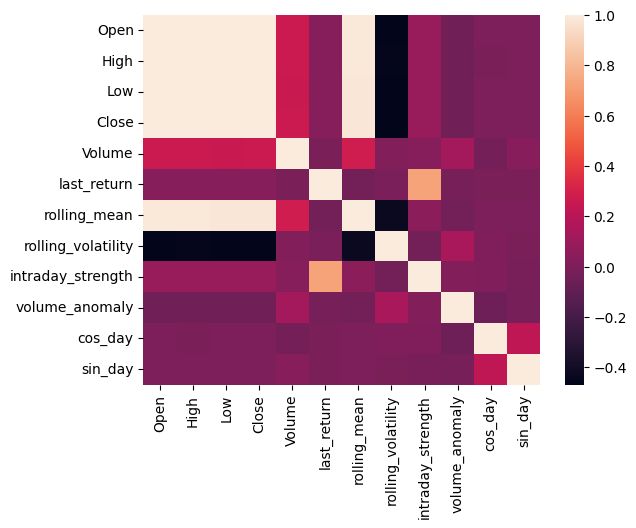

In [46]:
corr=df.corr()
sns.heatmap(corr)